In [159]:
import numpy as np
import pandas as pd
from keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [308]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words= 30000, maxlen = 100, test_split = 0.3 )

In [309]:
(x_train.shape, x_test.shape),( y_train.shape, y_test.shape)

(((4180,), (1792,)), ((4180,), (1792,)))

In [310]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [311]:
len(x_train[0]),len(x_train[1]), len(x_train[2])

(87, 56, 82)

In [312]:
# 1,2,5
# 5
# 6,8
# 6,1,2,4

In [313]:
# maxsize = 4
# 1,2,5,0
# 5,0,0,0
# 6,8,0,0
# 6,1,2,4


In [314]:
x_train = pad_sequences(x_train, padding = 'post')

x_test = pad_sequences(x_test, padding = 'post')


In [315]:
data_y = np.concatenate([y_train, y_test])

In [316]:
data_y = to_categorical(data_y)

In [317]:
y_train_ = data_y[:4180]
y_test_ = data_y[4180:]

In [318]:
x_train.shape, y_train.shape

((4180, 99), (4180,))

In [319]:
x_test.shape, y_test.shape

((1792, 99), (1792,))

In [320]:
x_train =np.array(x_train).reshape((x_train.shape[0],x_train.shape[1],1))
x_test = np.array(x_test).reshape(x_test.shape[0],x_test.shape[1],1)

In [321]:
x_train.shape, x_test.shape, y_train_.shape, y_test_.shape

((4180, 99, 1), (1792, 99, 1), (4180, 46), (1792, 46))

In [322]:
# Vanilla Simple RNN


In [323]:
from keras.models import Model, Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU

from keras import optimizers
from sklearn.metrics import accuracy_score

In [329]:
from keras.layers.core.activation import Activation
model = Sequential()
model.add(SimpleRNN(50, input_shape = (99,1), return_sequences = False))
model.add(Dense(46))
model.add(Activation('softmax'))


adam = optimizers.Adam()
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics= ['accuracy'])

In [330]:
y_train_.shape, x_train.shape

((4180, 46), (4180, 99, 1))

In [331]:
history_ = model.fit(x_train,y_train_, epochs = 10, batch_size = 10, validation_split=0.3 ,verbose = 1)

Epoch 1/10
293/293 [==============================] - 5s 14ms/step - loss: 2.1132 - accuracy: 0.4822 - val_loss: 1.7828 - val_accuracy: 0.5295
Epoch 2/10
293/293 [==============================] - 4s 13ms/step - loss: 1.9366 - accuracy: 0.4891 - val_loss: 1.7641 - val_accuracy: 0.5215
Epoch 3/10
293/293 [==============================] - 4s 13ms/step - loss: 1.9219 - accuracy: 0.4915 - val_loss: 1.7701 - val_accuracy: 0.5215
Epoch 4/10
293/293 [==============================] - 4s 14ms/step - loss: 1.9211 - accuracy: 0.4891 - val_loss: 1.7642 - val_accuracy: 0.5215
Epoch 5/10
293/293 [==============================] - 4s 13ms/step - loss: 1.9120 - accuracy: 0.4901 - val_loss: 1.7557 - val_accuracy: 0.5215
Epoch 6/10
293/293 [==============================] - 4s 13ms/step - loss: 1.9114 - accuracy: 0.4874 - val_loss: 1.7654 - val_accuracy: 0.5215
Epoch 7/10
293/293 [==============================] - 4s 13ms/step - loss: 1.8961 - accuracy: 0.4942 - val_loss: 1.7332 - val_accuracy: 0.5239

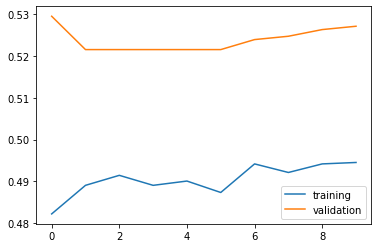

In [332]:
plt.plot(history_.history['accuracy'])
plt.plot(history_.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()

In [333]:
pred = model.predict(x_test)

56/56 [==============================] - 0s 4ms/step


In [334]:
y_test_pred = np.argmax(pred,1)

In [336]:
accuracy_score(y_test,y_test_pred )

0.5100446428571429

In [ ]:
# Stacked RNN


In [337]:
from keras.layers.core.activation import Activation
model = Sequential()
model.add(SimpleRNN(50, input_shape = (99,1), return_sequences = True))
model.add(SimpleRNN(50, return_sequences = True))
model.add(SimpleRNN(50, return_sequences = False))
model.add(Dense(46))
model.add(Activation('softmax'))


adam = optimizers.Adam()
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics= ['accuracy'])

In [338]:
y_train_.shape

(4180, 46)

In [339]:
history_ = model.fit(x_train,y_train_, epochs = 10, batch_size = 10, validation_split=0.3 ,verbose = 1)

Epoch 1/10
293/293 [==============================] - 15s 45ms/step - loss: 2.0478 - accuracy: 0.4792 - val_loss: 1.7450 - val_accuracy: 0.5207
Epoch 2/10
293/293 [==============================] - 13s 44ms/step - loss: 1.9066 - accuracy: 0.4966 - val_loss: 1.7271 - val_accuracy: 0.5207
Epoch 3/10
293/293 [==============================] - 13s 43ms/step - loss: 1.8965 - accuracy: 0.4880 - val_loss: 1.7439 - val_accuracy: 0.5231
Epoch 4/10
293/293 [==============================] - 14s 48ms/step - loss: 1.9145 - accuracy: 0.4891 - val_loss: 1.7810 - val_accuracy: 0.5215
Epoch 5/10
293/293 [==============================] - 14s 48ms/step - loss: 1.9064 - accuracy: 0.4935 - val_loss: 1.7275 - val_accuracy: 0.5279
Epoch 6/10
293/293 [==============================] - 13s 44ms/step - loss: 1.8878 - accuracy: 0.4836 - val_loss: 1.8001 - val_accuracy: 0.5215
Epoch 7/10
293/293 [==============================] - 13s 44ms/step - loss: 1.9184 - accuracy: 0.4938 - val_loss: 1.7551 - val_accuracy:

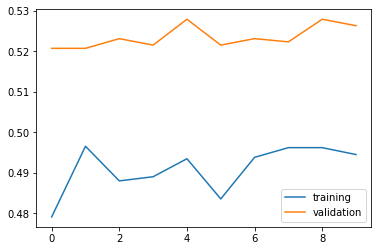

In [340]:
plt.plot(history_.history['accuracy'])
plt.plot(history_.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()

In [341]:
pred = model.predict(x_test)

56/56 [==============================] - 1s 12ms/step


In [342]:
y_test_pred = np.argmax(pred,1)

In [343]:
y_test_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [344]:
accuracy_score(y_test,y_test_pred )

0.5055803571428571

In [ ]:
# LSTM

In [345]:
from keras.layers.core.activation import Activation
model = Sequential()
model.add(LSTM(50, input_shape = (99,1), return_sequences = False))
model.add(Dense(46))
model.add(Activation('softmax'))


adam = optimizers.Adam()
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics= ['accuracy'])

In [346]:
history_ = model.fit(x_train,y_train_, epochs = 10, batch_size = 10, validation_split=0.3 ,verbose = 1)

Epoch 1/10
293/293 [==============================] - 10s 29ms/step - loss: 2.1453 - accuracy: 0.4921 - val_loss: 1.7191 - val_accuracy: 0.5303
Epoch 2/10
293/293 [==============================] - 8s 27ms/step - loss: 1.8741 - accuracy: 0.5027 - val_loss: 1.7061 - val_accuracy: 0.5215
Epoch 3/10
293/293 [==============================] - 8s 27ms/step - loss: 1.8655 - accuracy: 0.4945 - val_loss: 1.6506 - val_accuracy: 0.5813
Epoch 4/10
293/293 [==============================] - 8s 27ms/step - loss: 1.6776 - accuracy: 0.5988 - val_loss: 1.5191 - val_accuracy: 0.6053
Epoch 5/10
293/293 [==============================] - 8s 27ms/step - loss: 1.5819 - accuracy: 0.6268 - val_loss: 1.3844 - val_accuracy: 0.6722
Epoch 6/10
293/293 [==============================] - 8s 27ms/step - loss: 1.5475 - accuracy: 0.6347 - val_loss: 1.3704 - val_accuracy: 0.6778
Epoch 7/10
293/293 [==============================] - 8s 28ms/step - loss: 1.5409 - accuracy: 0.6364 - val_loss: 1.3833 - val_accuracy: 0.673

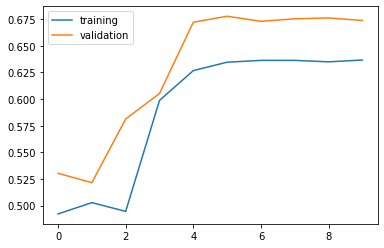

In [347]:
plt.plot(history_.history['accuracy'])
plt.plot(history_.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()

In [348]:
pred = model.predict(x_test)

56/56 [==============================] - 1s 9ms/step


In [349]:
y_test_pred = np.argmax(pred,1)

In [350]:
y_test_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [351]:
accuracy_score(y_test,y_test_pred )

0.6417410714285714

In [352]:
from keras.layers.core.activation import Activation
model = Sequential()
model.add(LSTM(50, input_shape = (99,1), return_sequences = True))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(46))
model.add(Activation('softmax'))


adam = optimizers.Adam()
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics= ['accuracy'])

In [353]:
history_ = model.fit(x_train,y_train_, epochs = 10, batch_size = 10, validation_split=0.1 ,verbose = 1)

Epoch 1/10
377/377 [==============================] - 38s 87ms/step - loss: 1.9444 - accuracy: 0.5064 - val_loss: 1.5514 - val_accuracy: 0.5909
Epoch 2/10
377/377 [==============================] - 31s 83ms/step - loss: 1.6530 - accuracy: 0.6095 - val_loss: 1.4229 - val_accuracy: 0.6722
Epoch 3/10
377/377 [==============================] - 32s 86ms/step - loss: 1.5811 - accuracy: 0.6239 - val_loss: 1.4289 - val_accuracy: 0.6579
Epoch 4/10
377/377 [==============================] - 32s 85ms/step - loss: 1.5315 - accuracy: 0.6369 - val_loss: 1.4047 - val_accuracy: 0.6651
Epoch 5/10
377/377 [==============================] - 31s 83ms/step - loss: 1.5233 - accuracy: 0.6396 - val_loss: 1.3961 - val_accuracy: 0.6651
Epoch 6/10
377/377 [==============================] - 32s 85ms/step - loss: 1.5180 - accuracy: 0.6372 - val_loss: 1.3892 - val_accuracy: 0.6722
Epoch 7/10
377/377 [==============================] - 32s 84ms/step - loss: 1.5010 - accuracy: 0.6374 - val_loss: 1.3681 - val_accuracy:

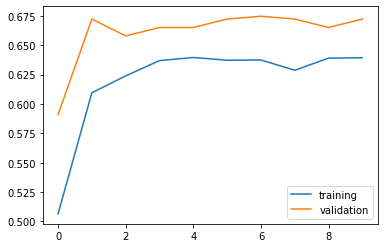

In [354]:
plt.plot(history_.history['accuracy'])
plt.plot(history_.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()

In [355]:
pred = model.predict(x_test)

56/56 [==============================] - 3s 28ms/step


In [356]:
y_test_pred = np.argmax(pred,1)

In [357]:
y_test_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [358]:
accuracy_score(y_test,y_test_pred )

0.6434151785714286

In [359]:
from keras.layers.core.activation import Activation
model = Sequential()
model.add(GRU(50, input_shape = (99,1), return_sequences = False))
model.add(Dense(46))
model.add(Activation('softmax'))


adam = optimizers.Adam()
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics= ['accuracy'])

In [360]:
history_ = model.fit(x_train,y_train_, epochs = 10, batch_size = 10, validation_split=0.3 ,verbose = 1)

Epoch 1/10
293/293 [==============================] - 12s 35ms/step - loss: 2.2156 - accuracy: 0.4877 - val_loss: 1.7164 - val_accuracy: 0.5295
Epoch 2/10
293/293 [==============================] - 9s 32ms/step - loss: 1.8527 - accuracy: 0.5034 - val_loss: 1.5857 - val_accuracy: 0.5710
Epoch 3/10
293/293 [==============================] - 10s 32ms/step - loss: 1.5965 - accuracy: 0.6217 - val_loss: 1.3679 - val_accuracy: 0.6683
Epoch 4/10
293/293 [==============================] - 9s 32ms/step - loss: 1.5444 - accuracy: 0.6285 - val_loss: 1.3680 - val_accuracy: 0.6699
Epoch 5/10
293/293 [==============================] - 10s 32ms/step - loss: 1.5274 - accuracy: 0.6350 - val_loss: 1.3645 - val_accuracy: 0.6707
Epoch 6/10
293/293 [==============================] - 9s 32ms/step - loss: 1.5148 - accuracy: 0.6340 - val_loss: 1.3691 - val_accuracy: 0.6715
Epoch 7/10
293/293 [==============================] - 10s 33ms/step - loss: 1.5083 - accuracy: 0.6340 - val_loss: 1.3433 - val_accuracy: 0.

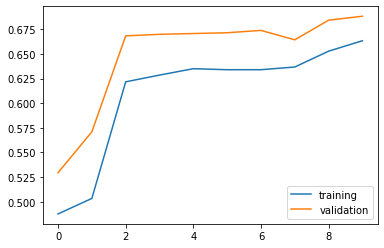

In [361]:
plt.plot(history_.history['accuracy'])
plt.plot(history_.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()

In [362]:
pred = model.predict(x_test)

56/56 [==============================] - 1s 9ms/step


In [363]:
y_test_pred = np.argmax(pred,1)

In [364]:
y_test_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [365]:
accuracy_score(y_test,y_test_pred )

0.65234375